In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

2023-12-27 11:29:00.202210: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 11:29:00.251122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 11:29:00.251158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 11:29:00.252420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 11:29:00.259872: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# Create the image data generator object to read the images (Augmntation task)
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
# Reading the data from directory
train_dataset = train_datagen.flow_from_directory(directory='../data/imagenet-new/train/',
                                          class_mode='categorical',
                                          batch_size=32,
                                          target_size=(64,64))

Found 5000 images belonging to 10 classes.


In [6]:
train_dataset.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [8]:
len(train_dataset.filenames)

5000

### Build The Model

In [9]:
def build_cnn(input_shape=(64,64,3), num_classes=10):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    return model

model = build_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                1

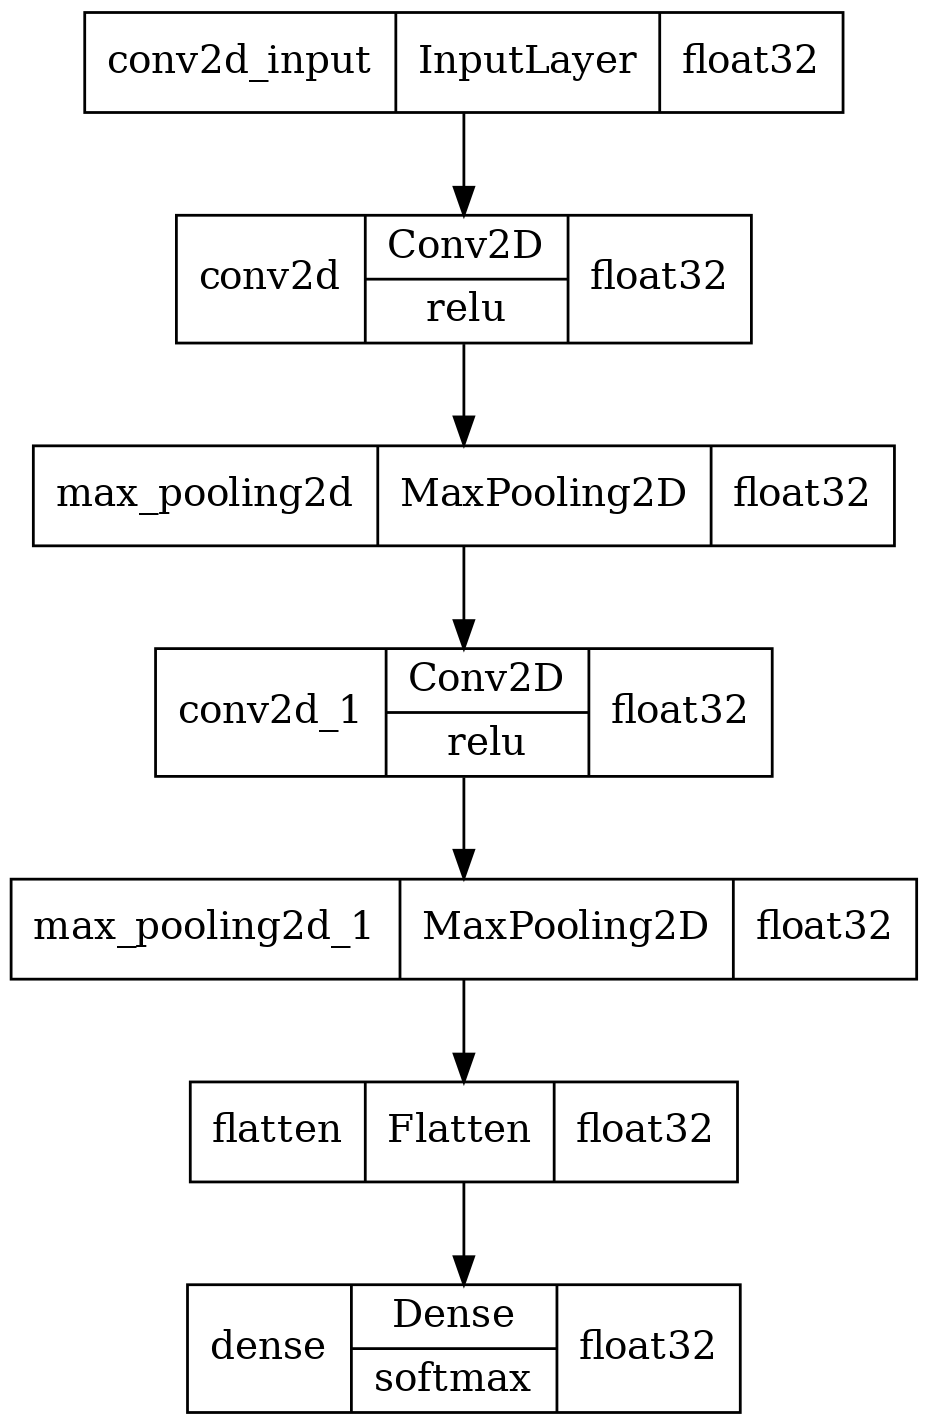

In [10]:
from keras.utils import plot_model
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, dpi=200)

### Compile the Model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the Model

In [12]:
history = model.fit(train_dataset, epochs=10, batch_size=10)

Epoch 1/10
157/157 [==============================] - 39s 241ms/step - loss: 1.9542 - accuracy: 0.2980
Epoch 2/10
157/157 [==============================] - 11s 67ms/step - loss: 1.6615 - accuracy: 0.4246
Epoch 3/10
157/157 [==============================] - 11s 67ms/step - loss: 1.5549 - accuracy: 0.4650
Epoch 4/10
157/157 [==============================] - 11s 68ms/step - loss: 1.4660 - accuracy: 0.5004
Epoch 5/10
157/157 [==============================] - 11s 67ms/step - loss: 1.3907 - accuracy: 0.5332
Epoch 6/10
157/157 [==============================] - 11s 67ms/step - loss: 1.3267 - accuracy: 0.5460
Epoch 7/10
157/157 [==============================] - 11s 68ms/step - loss: 1.2746 - accuracy: 0.5712
Epoch 8/10
157/157 [==============================] - 10s 67ms/step - loss: 1.2183 - accuracy: 0.5856
Epoch 9/10
157/157 [==============================] - 11s 67ms/step - loss: 1.1857 - accuracy: 0.6064
Epoch 10/10
157/157 [==============================] - 11s 67ms/step - loss: 1.13

In [19]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('../data/imagenet-new/test/images/test_21.JPEG')
img = img.reshape((1,64,64,3))

preds = model.predict(img, verbose=0)
pred_class = np.argmax(preds, axis=1)[0]
pred_class

6

In [20]:
train_dataset.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [40]:
classes = list(train_dataset.class_indices.keys())
classes

['crocodile',
 'fish',
 'fossils',
 'frog',
 'insect',
 'reptiles',
 'scorpion',
 'snake',
 'spider',
 'toad']

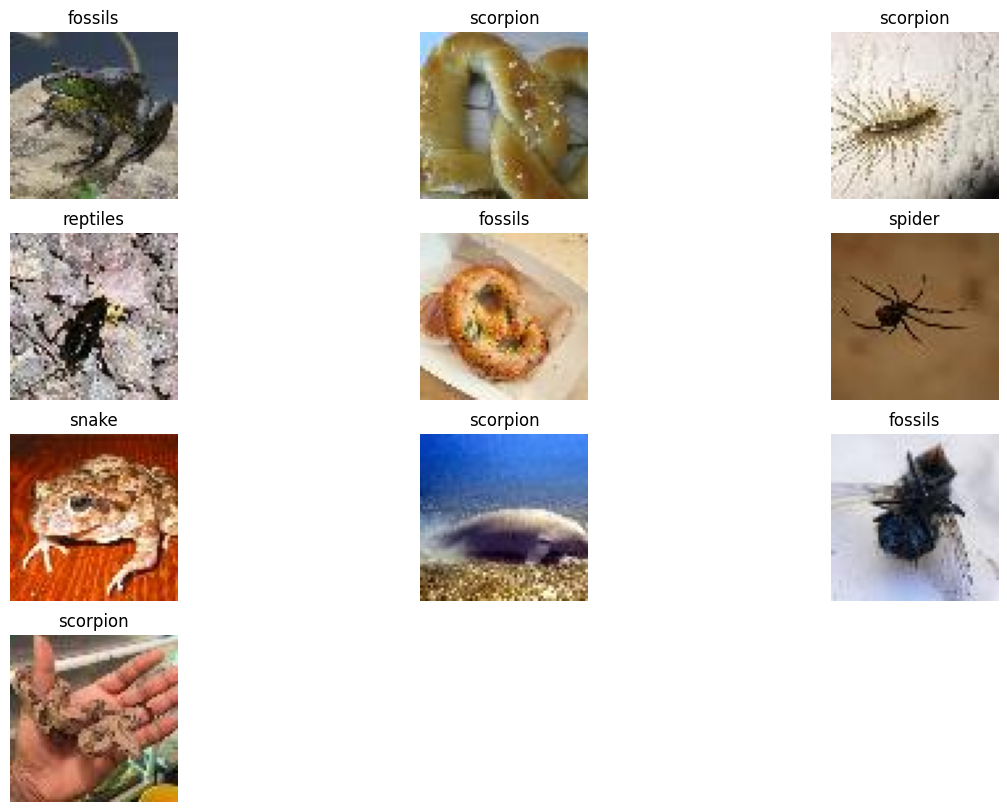

In [42]:
import os
val_images = os.listdir('../data/imagenet-new/new_val/')

new_val_dir = '../data/imagenet-new/new_val/'

nrows=4
ncols=3

plt.figure(figsize=(15,10))
for i in range(1, len(val_images)):
    plt.subplot(nrows, ncols, i)
    img = plt.imread(new_val_dir + val_images[i])
    plt.imshow(img)
    plt.axis('off')

    img = img.reshape((1,64,64,3))
    pred_class = np.argmax(model.predict(img, verbose=0), axis=1)[0]
    plt.title(classes[pred_class])
